# Titanic生存情况预测
# 1. 数据集介绍
**Titanic**数据集来自Kaggle竞赛平台的入门项目[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview)，数据记录了泰坦尼克号处女航撞上冰山沉没北大西洋时，不同年龄、性别和社会地位的乘客及船员的生存情况。数据一共包含两个文件，分别是训练数据(train.csv)和测试数据(test.csv)。数据经过适当的探索分析和预处理后，可开展泰坦尼克号乘客生存预测。数据字段及具体含义如下：

- PassengerId: ID
- Survived: Survival status: 0 = No, 1 = Yes
- Pclass: Ticket class: 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)
- Name: e.g., "Braund, Mr. Owen Harris"
- Sex: "female" or "male"
- Age: Age in years
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

# 2. 数据探索分析与预处理
## 2.1 导入数据

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('./titanic.csv')
print('数据集: ', data.shape)

数据集:  (1309, 12)


## 2.2 查看数据
查看数据导入情况

In [2]:
# 查看前5行
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 查看后5行
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,1,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
#查看数据维度
data.shape

(1309, 12)

In [5]:
# 浏览数据集整体情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
# 查看数据集统计信息
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.381971,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486055,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## 2.3 检查数据质量
针对数据可能存在的“不完整、不正确、不一致”问题，重点检查以下几个维度：<br>
* 不完整：查看缺失值；<br>
* 不正确：查看异常点和噪音；<br>
* 不一致：主要检查文本字段质量。<br>

In [7]:
#查看数据缺失情况
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

发现：1）Survived字段的缺失来自于测试集；2）Age和Cabin字段存在较多的数据缺失，Age字段可以尝试一定的缺失值补全，Cabin字段由于缺失值过多可以考虑删去。

<Axes: xlabel='Survived', ylabel='Age'>

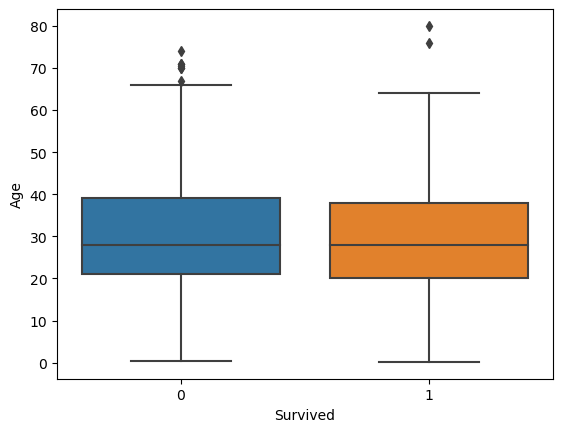

In [8]:
# 使用箱线图刻画Age变量的分布，查看异常点
import seaborn as sns
sns.boxplot(x = 'Survived', y ='Age', data = data)

发现：1）数据集中乘客平均年龄在30岁左右；2）数据集中乘客年龄存在异常点（高龄乘客）。3)平均而言，幸存者相对更年轻。

## 2.4 数据清洗
针对Titanic数据集，主要进行缺失值填充策略的探索。 <br>
1. 使用特定值（如均值、众数）填充缺失值

In [9]:
# 均值填充
# Age
print('年龄均值：', data['Age'].mean())
data['Age'] = data['Age'].fillna(data['Age'].mean())
# Fare
print('旅客票价均值：', data['Fare'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

年龄均值： 29.881137667304014
旅客票价均值： 33.29547928134557


In [10]:
# 众数填充
# Embarked
print(data['Embarked'].value_counts())
data['Embarked'] = data['Embarked'].fillna('S')

S    914
C    270
Q    123
Name: Embarked, dtype: int64


## 2.5 离散属性编码
1. 对Sex根据指定的map进行0-1编码

In [11]:
# Sex
data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [12]:
# Sex
Sex_map = {
    'female': 0,
    'male': 1
}
data['Sex'] = data['Sex'].map(Sex_map)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


2. 对变量Embarked(登船港口)进行编码

In [13]:
data = data.join(pd.get_dummies(data['Embarked'], prefix = 'Embarked'))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1


3. 对变量Pclass(船票等级)进行编码

In [14]:
data = data.join(pd.get_dummies(data['Pclass'], prefix = 'Pclass'))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1


## 2.6 特征工程
基于数据集已有字段和挖掘任务，有针对性地创建新的特征。 <br>
1. 提取变量Name中的头衔并编码

In [15]:
def get_title(name):
    str1 = name.split(',')[1]
    str2 = str1.split('.')[0]
    str3 = str2.strip()
    return str3

data['Title'] = data['Name'].map(get_title)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1,Mr


In [16]:
data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

变量Title中部分头衔并不常见，因此进行汇总处理，得到共6类，分别是Officer, Royalty, Mrs, Miss, Mr, Master

In [17]:
Title_map = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Rev': 'Officer',
    'Dr': 'Officer',
    'Col': 'Officer',
    'Ms': 'Mrs',
    'Mlle': 'Miss',
    'Major': 'Officer',
    'Dona': 'Royalty',
    'Sir': 'Royalty',
    'Capt': 'Officer',
    'the Countess': 'Royalty',
    'Don': 'Royalty',
    'Lady': 'Royalty',
    'Mme': 'Mrs',
    'Jonkheer': 'Royalty'
}
data['Title'] = data['Title'].map(Title_map)
data['Title'].value_counts()
data = data.join(pd.get_dummies(data['Title'], prefix = 'Title'))

2. 基于变量SibSp和Parch计算家庭规模数据

In [18]:
data['Family'] = data['SibSp'] + data['Parch'] + 1
data['FamilySingle'] = data['Family'].map(lambda a:1 if a == 1 else 0)
data['FamilySmall'] = data['Family'].map(lambda a:1 if 2 <= a <= 4 else 0)
data['FamilyLarge'] = data['Family'].map(lambda a:1 if 5 <= a else 0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Family,FamilySingle,FamilySmall,FamilyLarge
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,0,2,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,2,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,0,0,1,0,0,2,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,1,1,0,0


## 2.6 数据标准化
可以利用sklearn.preprocessing包实现数据标准化操作。其中，[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)可用来做正态标准化，[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)可用来做最小最大标准化。<br>

In [19]:
#选取range不在[0,1]的变量
print(data.describe())
data_r = data[['Age', 'SibSp', 'Parch', 'Fare',  'Family']]

       PassengerId     Survived       Pclass          Sex          Age  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean    655.000000     0.381971     2.294882     0.644003    29.881138   
std     378.020061     0.486055     0.837836     0.478997    12.883193   
min       1.000000     0.000000     1.000000     0.000000     0.170000   
25%     328.000000     0.000000     2.000000     0.000000    22.000000   
50%     655.000000     0.000000     3.000000     1.000000    29.881138   
75%     982.000000     1.000000     3.000000     1.000000    35.000000   
max    1309.000000     1.000000     3.000000     1.000000    80.000000   

             SibSp        Parch         Fare   Embarked_C   Embarked_Q  ...  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000  ...   
mean      0.498854     0.385027    33.295479     0.206264     0.093965  ...   
std       1.041658     0.865560    51.738879     0.404777     0.291891  ...   
min       0.00000

In [20]:
#正态标准化
from sklearn import preprocessing
z_scaler = preprocessing.StandardScaler().fit(data_r)
data[['Age', 'SibSp', 'Parch', 'Fare', 'Family']] = z_scaler.transform(data_r)

## 2.7 特征选择

In [21]:
for col in data.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked
Embarked_C
Embarked_Q
Embarked_S
Pclass_1
Pclass_2
Pclass_3
Title
Title_Master
Title_Miss
Title_Mr
Title_Mrs
Title_Officer
Title_Royalty
Family
FamilySingle
FamilySmall
FamilyLarge


In [22]:
data_s = data.drop(['Pclass', 'Name', 'Cabin', 'Ticket', 'Embarked', 'Title', 'Family'], axis = 1)

# 3. 生存情况预测
## 3.1 数据集划分

In [23]:
from sklearn.model_selection import train_test_split
# Separating into X and Y
X = data_s.drop(['Survived'], axis = 1)
y = data_s['Survived']
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)
print(X_train.shape, X_test.shape)

(1047, 21) (262, 21)


## 3.2 逻辑回归
### 模型构建

In [24]:
from sklearn.linear_model import LogisticRegression
# Fitting a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/cjw/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 效果评价

In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [26]:
# Prediction & Evaluation
print("Logistic regression score for test set:")
# Precision, Recall, F1-score
y_hat_test = logreg.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = logreg.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Logistic regression score for test set:
Precision: 0.842 Recall: 0.734
F1 score: 0.784
AUC score: 0.865


### 解决样本不平衡

In [27]:
logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X_train, y_train)
# Prediction & Evaluation
print("Logistic regression score for test set:")
# Precision, Recall, F1-score
y_hat_test = logreg.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = logreg.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Logistic regression score for test set:
Precision: 0.811 Recall: 0.789
F1 score: 0.800
AUC score: 0.865


/Users/cjw/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3.3 朴素贝叶斯
### 模型构建

In [28]:
from sklearn.naive_bayes import BernoulliNB
# Fitting a Naive Bayes model with default parameters
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

### 效果评价

In [29]:
# Prediction & Evaluation
print("Naive Bayes score for test set:")
# Precision, Recall, F1-score
y_hat_test = clf.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = clf.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Naive Bayes score for test set:
Precision: 0.746 Recall: 0.807
F1 score: 0.775
AUC score: 0.837


## 3.4 决策树
### 模型构建

In [30]:
from sklearn.tree import DecisionTreeClassifier
# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### 效果评价

In [31]:
# Prediction & Evaluation
print("Decision tree score for test set:")
# Precision, Recall, F1-score
y_hat_test = dt.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = dt.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Decision tree score for test set:
Precision: 0.705 Recall: 0.615
F1 score: 0.657
AUC score: 0.716


### 可视化

[Text(0.5271500906892382, 0.9772727272727273, 'Title_Mr <= 0.5\ngini = 0.468\nsamples = 1047\nvalue = [656, 391]'),
 Text(0.2351874244256348, 0.9318181818181818, 'Pclass_3 <= 0.5\ngini = 0.439\nsamples = 434\nvalue = [141, 293]'),
 Text(0.11084240225715437, 0.8863636363636364, 'Title_Officer <= 0.5\ngini = 0.218\nsamples = 225\nvalue = [28, 197]'),
 Text(0.08625554212011285, 0.8409090909090909, 'Fare <= -0.542\ngini = 0.135\nsamples = 206\nvalue = [15, 191]'),
 Text(0.07980652962515115, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09270455461507457, 0.7954545454545454, 'Fare <= -0.031\ngini = 0.127\nsamples = 205\nvalue = [14, 191]'),
 Text(0.06932688432083838, 0.75, 'Fare <= -0.038\ngini = 0.229\nsamples = 91\nvalue = [12, 79]'),
 Text(0.06287787182587666, 0.7045454545454546, 'Title_Royalty <= 0.5\ngini = 0.215\nsamples = 90\nvalue = [11, 79]'),
 Text(0.05642885933091495, 0.6590909090909091, 'PassengerId <= 764.5\ngini = 0.199\nsamples = 89\nvalue = [10, 79]

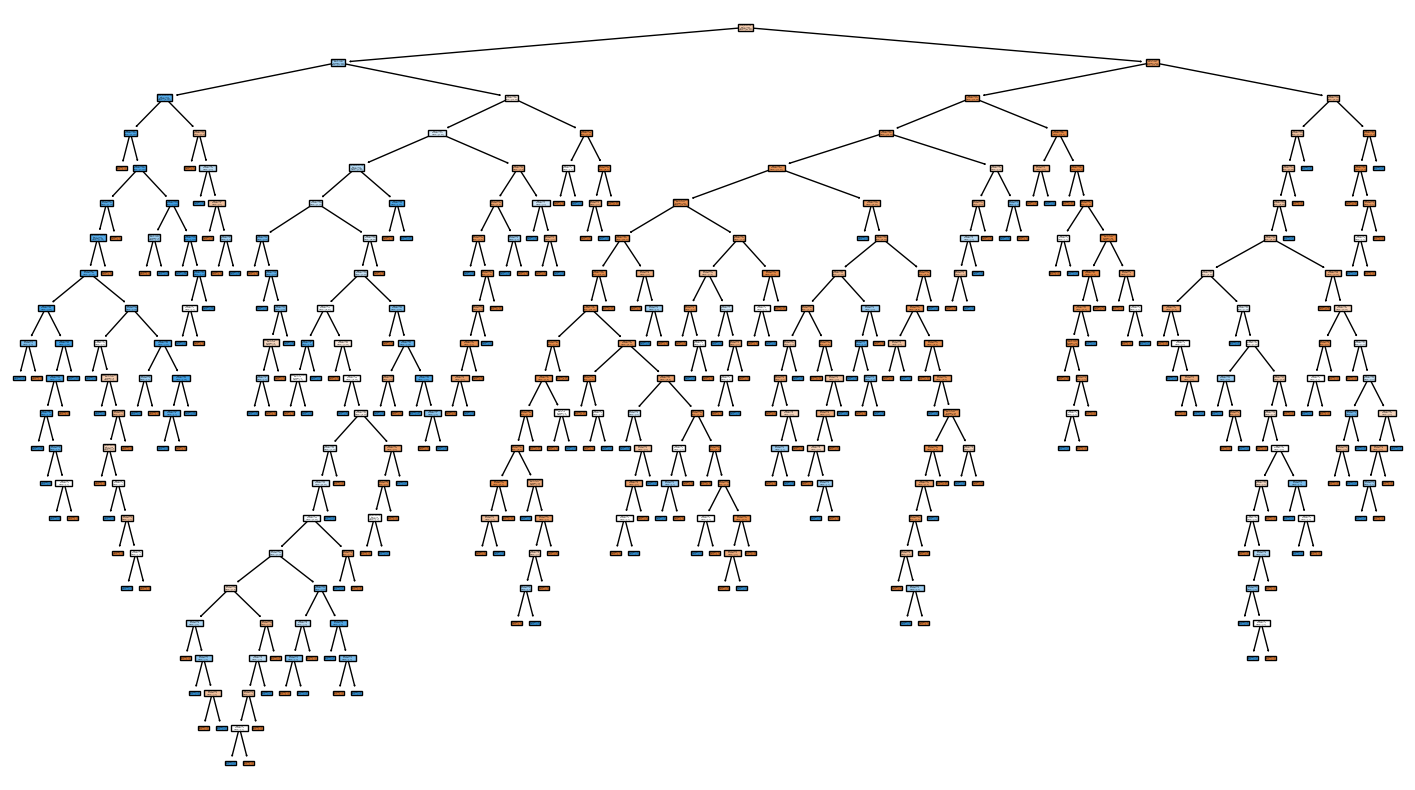

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt 
plt.figure(figsize = (18, 10))
tree.plot_tree(dt, feature_names = X_train.columns, filled = True)

### 防止过拟合

In [33]:
from sklearn.tree import DecisionTreeClassifier
# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
# Prediction & Evaluation
print("Decision tree score for test set:")
# Precision, Recall, F1-score
y_hat_test = dt.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = dt.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Decision tree score for test set:
Precision: 0.835 Recall: 0.743
F1 score: 0.786
AUC score: 0.870


[Text(0.5, 0.875, 'Title_Mr <= 0.5\ngini = 0.468\nsamples = 1047\nvalue = [656, 391]'),
 Text(0.25, 0.625, 'Pclass_3 <= 0.5\ngini = 0.439\nsamples = 434\nvalue = [141, 293]'),
 Text(0.125, 0.375, 'Title_Officer <= 0.5\ngini = 0.218\nsamples = 225\nvalue = [28, 197]'),
 Text(0.0625, 0.125, 'gini = 0.135\nsamples = 206\nvalue = [15, 191]'),
 Text(0.1875, 0.125, 'gini = 0.432\nsamples = 19\nvalue = [13, 6]'),
 Text(0.375, 0.375, 'Fare <= -0.192\ngini = 0.497\nsamples = 209\nvalue = [113, 96]'),
 Text(0.3125, 0.125, 'gini = 0.495\nsamples = 171\nvalue = [77, 94]'),
 Text(0.4375, 0.125, 'gini = 0.1\nsamples = 38\nvalue = [36, 2]'),
 Text(0.75, 0.625, 'Pclass_1 <= 0.5\ngini = 0.269\nsamples = 613\nvalue = [515, 98]'),
 Text(0.625, 0.375, 'Age <= 0.184\ngini = 0.213\nsamples = 478\nvalue = [420, 58]'),
 Text(0.5625, 0.125, 'gini = 0.246\nsamples = 369\nvalue = [316, 53]'),
 Text(0.6875, 0.125, 'gini = 0.088\nsamples = 109\nvalue = [104, 5]'),
 Text(0.875, 0.375, 'Age <= 1.912\ngini = 0.417\ns

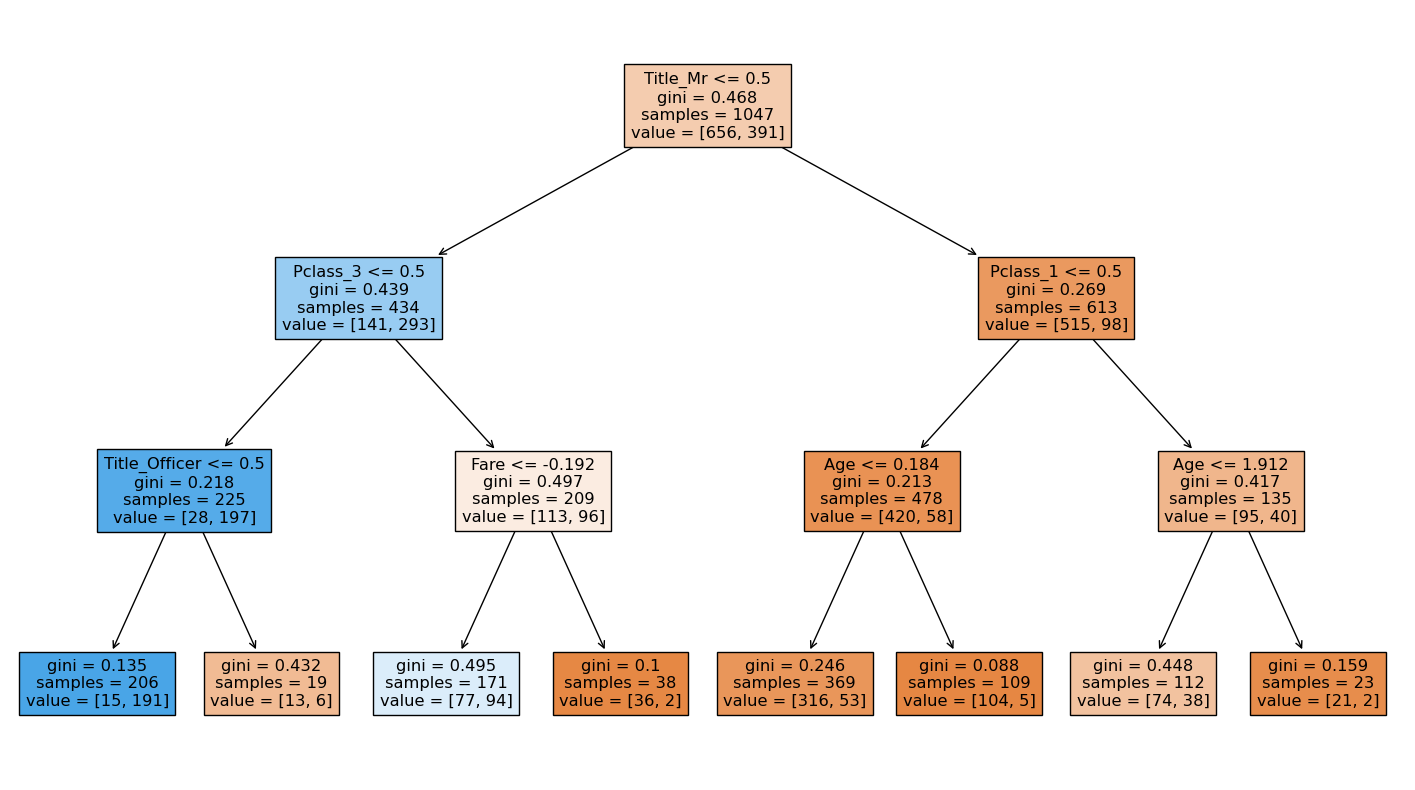

In [35]:
plt.figure(figsize = (18, 10))
tree.plot_tree(dt, feature_names = X_train.columns, filled = True)

### 参数选择

In [36]:
from sklearn.tree import DecisionTreeClassifier
# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [37]:
# Prediction & Evaluation
print("Decision tree score for test set:")
# Precision, Recall, F1-score
y_hat_test = dt.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = dt.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Decision tree score for test set:
Precision: 0.894 Recall: 0.541
F1 score: 0.674
AUC score: 0.838


In [38]:
from sklearn.tree import DecisionTreeClassifier
# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [39]:
# Prediction & Evaluation
print("Decision tree score for test set:")
# Precision, Recall, F1-score
y_hat_test = dt.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = dt.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Decision tree score for test set:
Precision: 0.843 Recall: 0.688
F1 score: 0.758
AUC score: 0.863
